<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [80]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

NOTE: All CSVs are in the same directory as this notebook

In [81]:
sat_scores = './sat_scores_wo_all.csv'

### 1.1 Make a pandas DataFrame object with pandas `.read_csv()` function

Take a look at the `.dtypes` attribute in the DataFrame. 

In [82]:
sat_df = pd.read_csv(sat_scores)
sat_df.shape[0]

51

### 1.2 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [83]:
sat_df.head(52)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [84]:
sat_df.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


In [85]:
sat_df.shape[0]

51

The data describes the Verbal and Math score averages for each state. It also includes a rate. While it does not say exactly what the rate represents, I would say either graduation rates or college admissions rates. Describe shows the means for each state, as well as the max and several percentiles.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [86]:
(sat_df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
State     51 non-null object
Rate      51 non-null int64
Verbal    51 non-null int64
Math      51 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


 Data Dictionary:
 
 Data    | Description                 | Type
-------- ----------------------------- --------
State   |State in the US              | String
Rate    |Pct of Students who took SAT | Integer
Verbal  |Verbal Score of SAT          | Integer
Math    |Math Score of SAT            | Integer


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

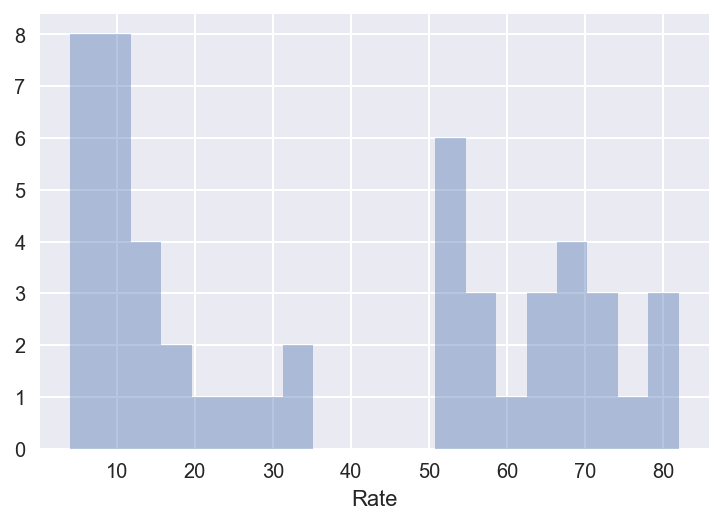

In [87]:
sns.distplot(sat_df['Rate'],bins=20, kde=False)

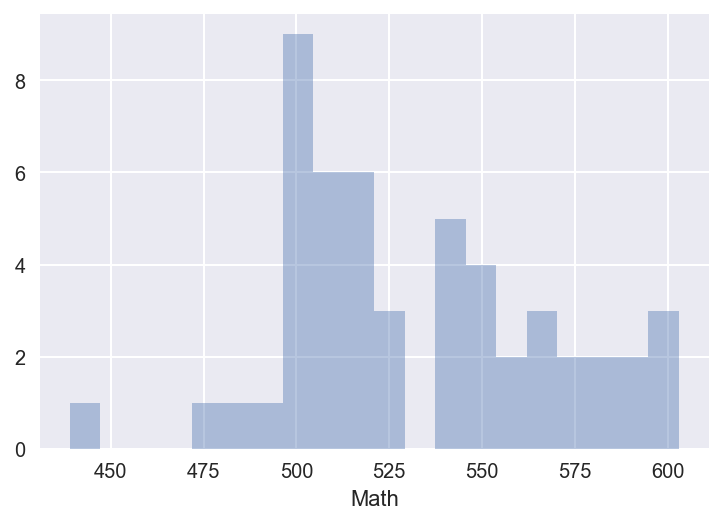

In [88]:
sns.distplot(sat_df['Math'], bins=20, kde=False)

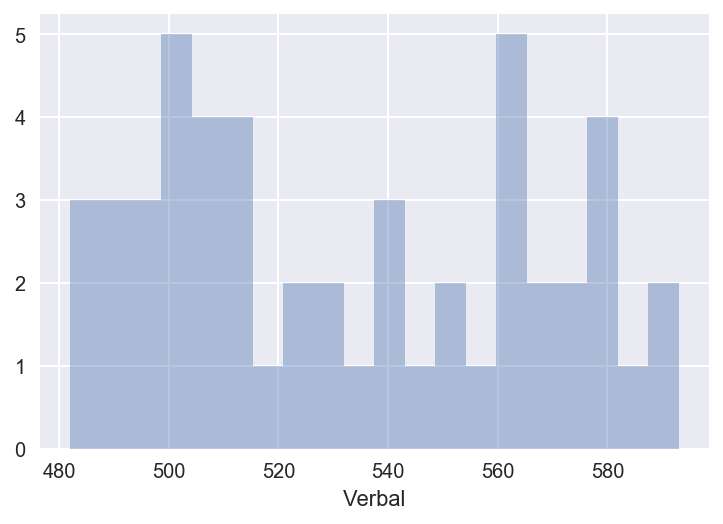

In [89]:
sns.distplot(sat_df['Verbal'],bins=20, kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

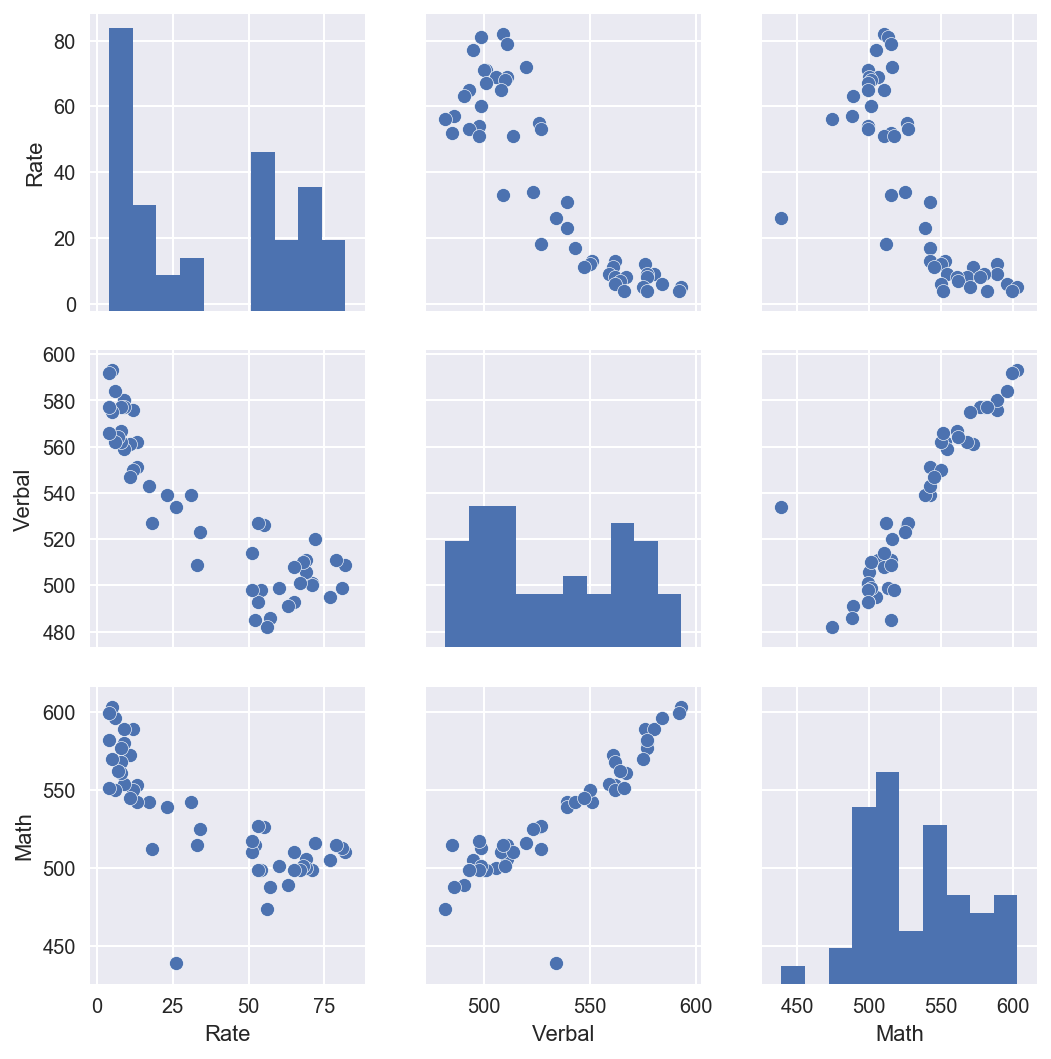

In [90]:
sns.pairplot(sat_df) # based on the pairplot, there appears to be a strong correlation b/n Math and Verbal scores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [91]:
m_v_df = sat_df[['Math','Verbal']]

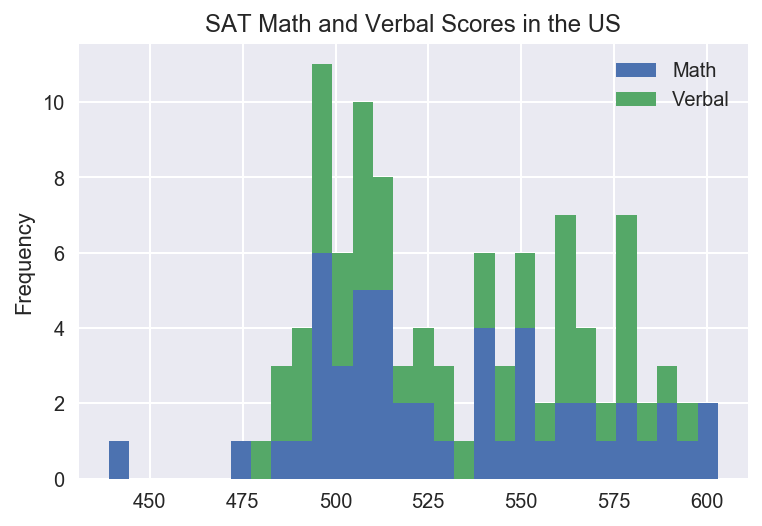

In [92]:
m_v_df.plot(kind='hist', stacked=True, bins=30, title='SAT Math and Verbal Scores in the US')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

The advantage of a boxplot over a scatterplot or histogram is that the boxplot displays the median as well as the upper quartile, lower quartile, minimum and maximum data value and displays the data's symmetry and skewness.

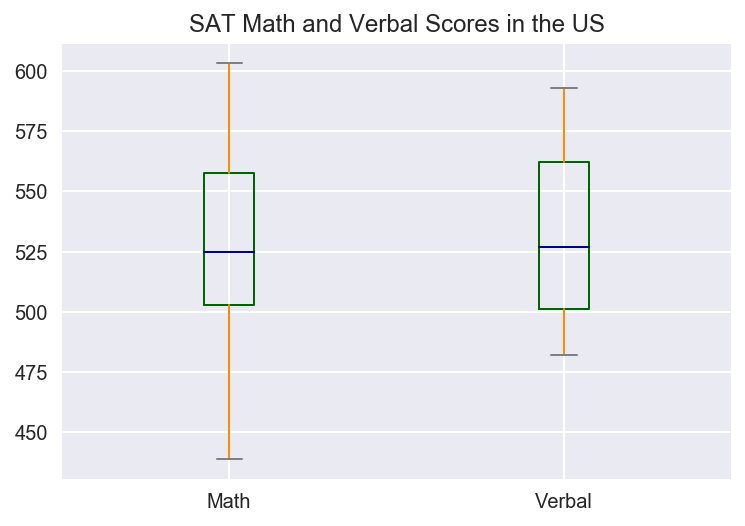

In [93]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
               medians='DarkBlue', caps='Gray')
m_v_df.plot.box(color=color, sym='r+', title='SAT Math and Verbal Scores in the US')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [94]:
#sat_df.plot(kind='box', title='SAT Math and Verbal Scores in the US')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have an average `Verbal` score greater than the average of `Verbal` scores across the entire dataset

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [95]:
sat_df.mean()

Rate       37.000000
Verbal    532.529412
Math      531.843137
dtype: float64

 Verbal mean is 532.5 across the dataset. Twenty four states are above the mean for Verbal scores. It is close to a normal distribution but since there are 50 states plus DC and only 24 are above the mean, there appears to be some lower scoring states pushing the mean down to some degree.

In [96]:
# Calculate the states that have SAT Verbal scores above the mean(532.5)

sat_df.loc[(sat_df['Verbal'] > 532.5),['State','Verbal']].sort_values('Verbal', ascending=False)

,State,Verbal
47,IA,593
49,ND,592
44,WI,584
37,MN,580
48,SD,577
38,KS,577
42,MO,577
33,IL,576
46,UT,575
41,OK,567


In [97]:
# The number of states that have Verbal scores on SAT greater than the mean.
sat_df.loc[(sat_df['Verbal'] > 532.5),['State','Verbal']].shape

(24, 2)

### 5.2 Find the list of states that have a median `Verbal` score greater than the median of `Verbal` scores across the entire dataset

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

This is the same as the list above the mean. The reason would be that the median is close to the mean.

In [98]:
# Calculate the list of states that have median Verbal score greater than the median of the data set.
# First calculate the median score for Verbal test.
med_verb = sat_df['Verbal'].median()
int(med_verb)

527

In [99]:
# Next calculate the states that had test scores above the median.
sat_df.loc[(sat_df['Verbal'] > med_verb), ['State', 'Verbal']].sort_values('Verbal', ascending=False)

,State,Verbal
47,IA,593
49,ND,592
44,WI,584
37,MN,580
48,SD,577
38,KS,577
42,MO,577
33,IL,576
46,UT,575
41,OK,567


In [100]:
# Calculate the number of states above the Median Verbal score.
len(sat_df.loc[(sat_df['Verbal'] > med_verb), ['State', 'Verbal']].sort_values('Verbal', ascending=False))

24

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [101]:
sat_df.head()


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [102]:
sat_df['verbal_math'] = sat_df['Verbal'] - sat_df['Math']
sat_df

,State,Rate,Verbal,Math,verbal_math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


In [103]:
#verbal_math = sat_df['Verbal_Math'] = sat_df['Verbal'] - sat_df['Math'].copy # Create a new column for the difference between Verbal and Math scores.




### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [104]:
sat_df.sort_values(['verbal_math'], ascending=False).head(10)#These are the ten states that have the greatest discrepency of scores; Verbal over Math.

,State,Rate,Verbal,Math,verbal_math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
31,TN,13,562,553,9
9,VA,68,510,501,9
32,NM,13,551,542,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [105]:
 sat_df.sort_values(['verbal_math'], ascending=True).head(10)#These are the ten states that have the greatest discrepency of scores; Math over Verbal.

,State,Rate,Verbal,Math,verbal_math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
49,ND,4,592,599,-7


In [106]:
sat_df.sort_values(['Verbal'], ascending=False).head(3)

,State,Rate,Verbal,Math,verbal_math
47,IA,5,593,603,-10
49,ND,4,592,599,-7
44,WI,6,584,596,-12


In [107]:
sat_df.sort_values(['Math'], ascending=False).head(3)

,State,Rate,Verbal,Math,verbal_math
47,IA,5,593,603,-10
49,ND,4,592,599,-7
44,WI,6,584,596,-12


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).


- Use seaborn's `.heatmap` method to add some color to the matrix
- Set `annot=True`


In [108]:
sat_corr = sat_df.drop(['State','Rate','verbal_math'], axis=1)

In [109]:
corr = sat_corr.corr()

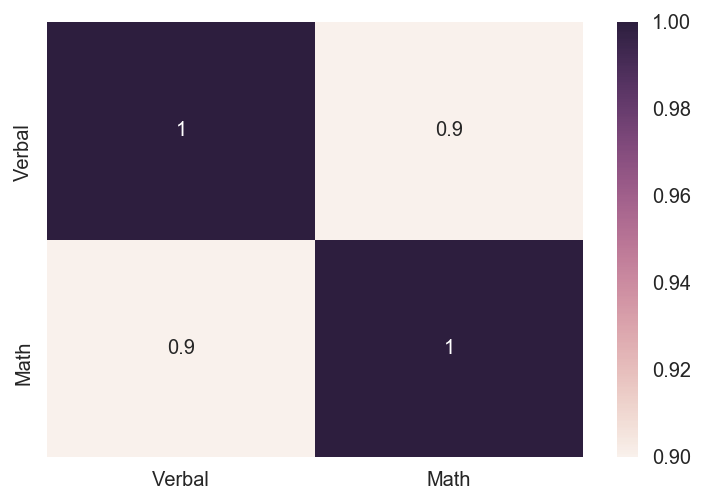

In [110]:
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, annot=True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [111]:
sat_df.describe()

,Rate,Verbal,Math,verbal_math
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

There are no null values but there are some fields that contain a dash (-). There a a few of them and they will be ignored in this EDA.

In [112]:
drugs_df = pd.read_csv('drug-use-by-age.csv')

In [113]:
drugs_df.iloc[:,0:-1] 

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3


In [114]:
drugs_df.isnull().sum() 

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [115]:
drugs_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

I noticed a relationship between heroin and oxycontin use. See associated plots.

In [116]:
drugs_corr = drugs_df.corr()

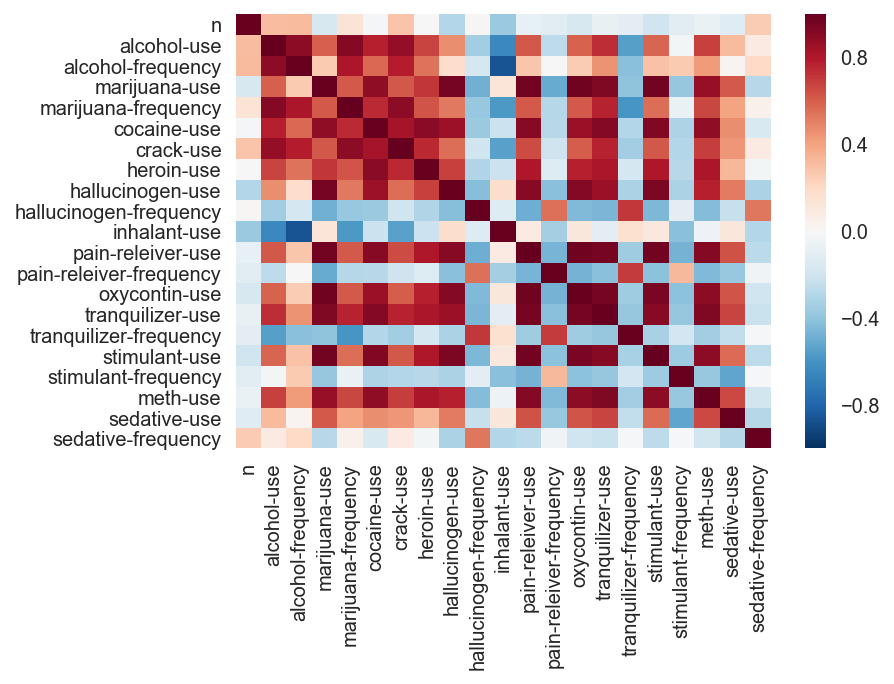

In [117]:
sns.heatmap(drugs_corr)

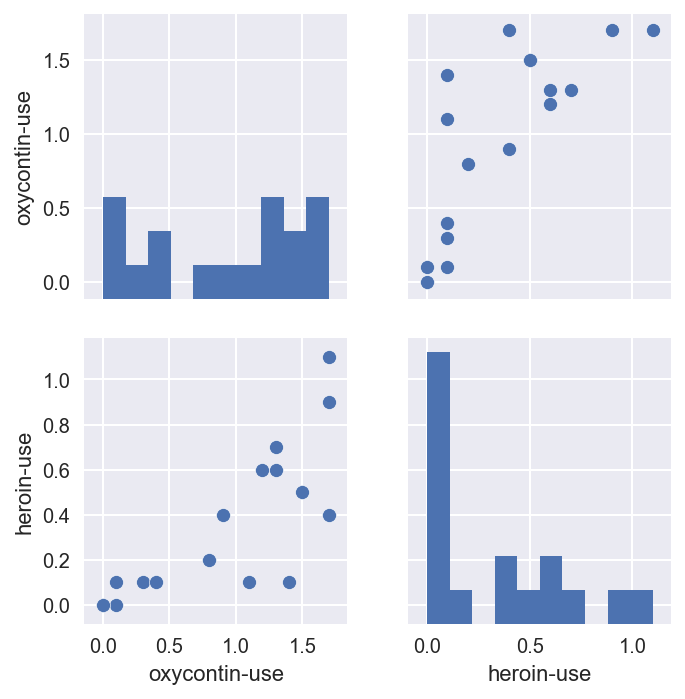

In [118]:
sns.pairplot(drugs_df[['oxycontin-use','heroin-use','oxycontin-frequency','heroin-frequency']])


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


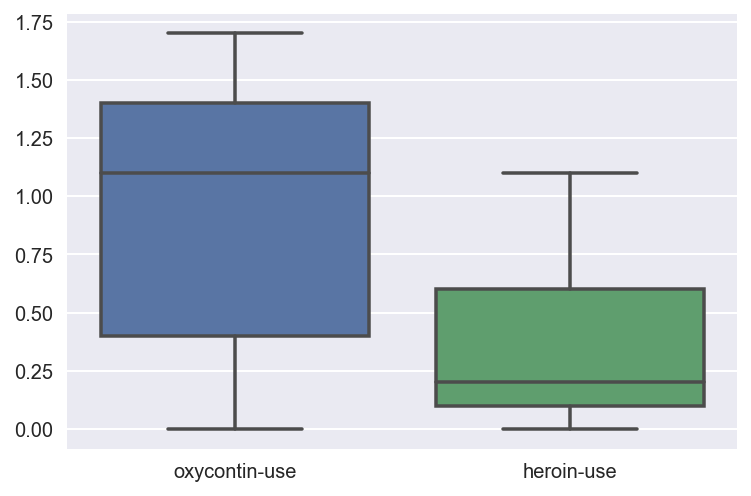

In [119]:
sns.boxplot(drugs_df[['oxycontin-use', 'heroin-use']])

In [120]:
drugs_plot = drugs_df.set_index('age')

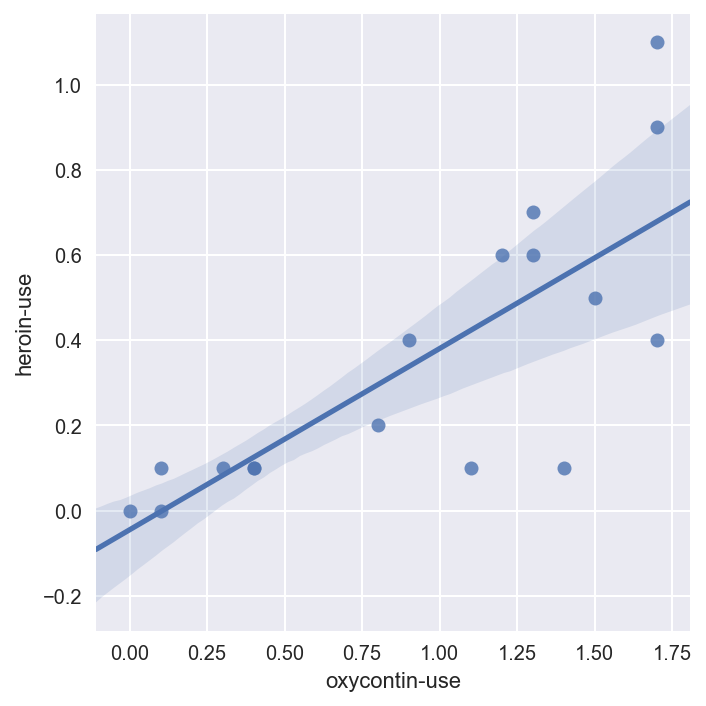

In [121]:
sns.lmplot('oxycontin-use', 'heroin-use', data=drugs_plot)

The plot above shows a positive correlation between heroin use and oxycontin use.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**
Are oxycontin use and heroin use are highly correlated?
H0 = Oxycontin use and heroin use are unrelated.
H1 = Oxycontin use is highly correlated to the use of heroin.

Since the pvalue is 0.00154764969657, which is approaching zero, we can reject the null hypothesis and accept the H1 hypothesis.

...

In [122]:
drugs_df['oxycontin-use'].mean()

0.9352941176470588

In [123]:
drugs_df['heroin-use'].mean()

0.3529411764705882

In [124]:
drugs_df['oxycontin-use'].std()

0.608215809222545

In [125]:
drugs_df['heroin-use'].std()

0.3337619792959189

In [126]:
len(drugs_df['oxycontin-use'])

17

In [127]:
# Code


# Null hypothesis is that the machines have the same performance.
mean_oxy = 0.9352941176470588
mean_her = 0.3529411764705882
std_oxy = 0.608215809222545
std_her = 0.3337619792959189
n = 17

t_stat, pvalue = stats.ttest_ind_from_stats(mean_oxy, std_oxy,17, mean_her, std_her, 17)
print('t_stat is ', t_stat)
print('pvalue is ', pvalue)


t_stat is  3.46092499676
pvalue is  0.00154764969657


**Report**


After doing the EDA including Heatmaps and pairplots, it was evident that there is a correlation between oxycontin use and heroin use. This was further validated by the testable hypothesis and the lm plot.
...